In [2]:
import numpy as np
import pandas as pd
import math
import sys
import copy
import glob
import os
from PlotUtility import *
from DataUtility import *

In [3]:
dataPath = "./OptimizedData/"
mergedDataPath = MergeJsonAndLabel(dataPath, "./", "OptimizedFinal.json")
dataset = Dataset(mergedDataPath, Debug = True)

        Label  Hand  IndexCurl  MiddleCurl  RingCurl  PinkyCurl  ThumbCurl  \
0        Fist    -1   0.388441    0.595217  0.686365   0.752350   0.603996   
1       Point    -1   0.068045    0.514199  0.668354   0.734244   0.640029   
2       Point    -1   0.037026    0.446778  0.630210   0.668478   0.675106   
3  ThumbsDown    -1   0.140332    0.326700  0.366442   0.398587   0.382245   
4       Pinch    -1   0.371352    0.821174  0.881386   0.898628   0.545856   

   WristXRotation  WristYRotation  WristZRotation  ...  PinkyTipZForward  \
0       329.51630       309.27650       347.69700  ...          0.088071   
1        12.74996       121.37370        57.06156  ...          0.011605   
2       353.38200       276.41530       112.17330  ...         -0.612024   
3        19.85276        30.83629       286.37130  ...         -0.579292   
4       288.20350       247.30270        75.06673  ...         -0.066824   

   PinkyTipXUp  PinkyTipYUp  PinkyTipZUp  PinkyTipXRight  PinkyTipYRight  

0.01
0.1
1
10
100
1000


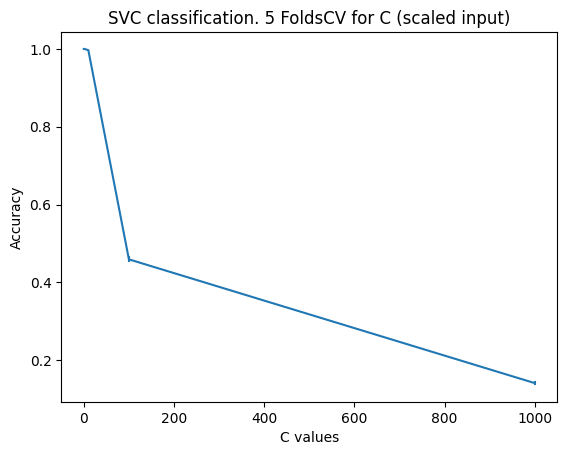

In [4]:
CVals = [0.01,0.1,1,10,100,1000]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

[0.01, 0.1, 1, 10, 100]


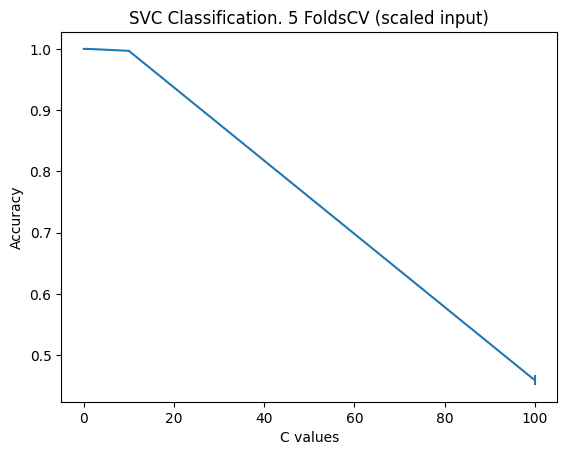

In [12]:
xAxis = CVals[:-1]
zoomMSE = mse[:-1]
zoomSTD = std[:-1]
print(xAxis)
MeanSquareErrorPlot("SVC Classification. 5 FoldsCV (scaled input)", "C values", xAxis, zoomMSE, zoomSTD, yLabel = "Accuracy")

In [13]:
idealC = 10
TestValidationAccuracy("SVC", dataset, c = idealC, K = None, scaleInput = True)

Getting Validation accuracy for SVC
Validation Accuracy for SVC : 0.9987785016286646


In [ ]:
idealC = 10
SVCModel = MLModel()
SVCModel.AssignModelAndHyperParameters("SVC", c = idealC)
SVCModel.TrainModel(dataset, True)
SVCModel.ExportModel("./", "OptimizedFeatures")

0.01


C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

0.1


C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

1


C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mradt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

10
100
1000


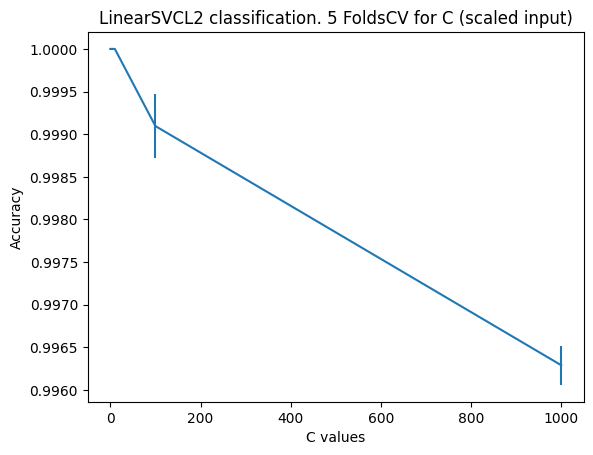

In [14]:
CVals = [0.01,0.1,1,10,100,1000]
mse,std = PerformKFoldsValidationAndPlot("LinearSVCL2", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

[0.01, 0.1, 1, 10, 100]


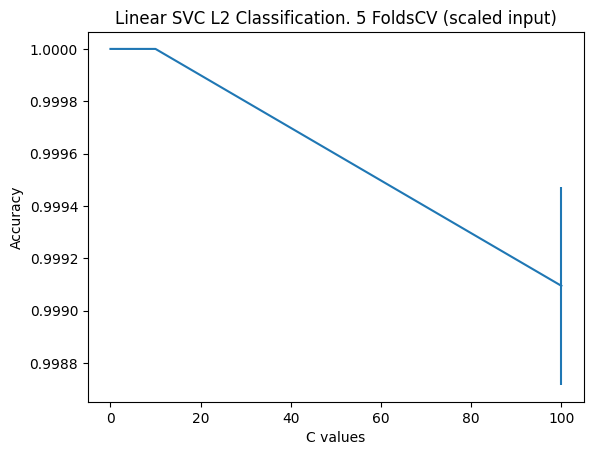

In [15]:
xAxis = CVals[:-1]
zoomMSE = mse[:-1]
zoomSTD = std[:-1]
print(xAxis)
MeanSquareErrorPlot("Linear SVC L2 Classification. 5 FoldsCV (scaled input)", "C values", xAxis, zoomMSE, zoomSTD, yLabel = "Accuracy")

In [16]:
idealC = 10
TestValidationAccuracy("LinearSVCL2", dataset, c = idealC, K = None, scaleInput = True)

Getting Validation accuracy for LinearSVCL2
Validation Accuracy for LinearSVCL2 : 1.0


In [3]:
idealC = 10
LinearSVCL2 = MLModel()
LinearSVCL2.AssignModelAndHyperParameters("LinearSVCL2", c = idealC)
LinearSVCL2.TrainModel(dataset, True)
LinearSVCL2.ExportModel("./", "OptimizedFeaturesLinear")

Fitting LinearSVCL2
Saving model ./OptimizedFeaturesLinearModelLinearSVCL2.joblib


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


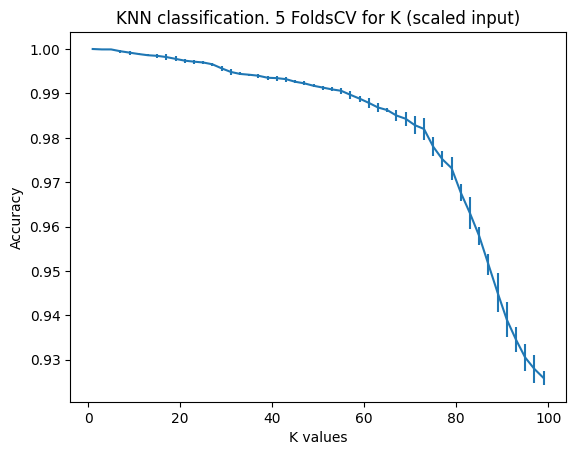

In [17]:
#KNN
KVals = np.arange(1,101,2)
mse,std = PerformKFoldsValidationAndPlot("KNN", dataset, KVals, "K", yLabel = "Accuracy", scale = True)

In [19]:
idealK = 61
TestValidationAccuracy("KNN", dataset, c = None, K = idealK, scaleInput = True)

Getting Validation accuracy for KNN
Validation Accuracy for KNN : 0.988599348534202


In [23]:
#  Get Dummy accuracy
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(dataset.trainX, dataset.trainY)
# dummy_clf.predict(dataset.validateX)
dummy_clf.score(dataset.validateX, dataset.validateY)

0.1486156351791531